# Groupby()

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Groupby is a way of splitting a dataset into subgroups like Sex or Age.

To have a meaningful display, an aggreagation functions would also be chained to the groupby to compute summary stats

In [144]:
df = pd.read_csv(r"C:\Users\nrmmw\Documents\Flatiron\dsc-dealing-missing-data-lab\titanic.csv", 
                 index_col = 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [146]:
# Grouping by the Sex Column
df.groupby('Sex').sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Sex,,,,,,
female,135343,233,7286.00,218,204,13966.6628
male,262043,109,13919.17,248,136,14727.2865


## Aggregation Functions

The most common aggregaate methods are:
- .min(): returns the minimum value for each column by group
- .max(): returns the maximum value for each column by group
- .mean(): returns the average value for each column by group
- .median(): returns the median value for each column by group
- .count(): returns the count of each column by group

In [147]:
#You can aggregate by multiple groups
df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        467.965909  0.965909  34.531646  0.568182  0.488636   
       2        426.100000  0.914286  27.757353  0.442857  0.557143   
       3        395.598540  0.503650  21.892857  0.839416  0.751825   
       ?        533.578947  0.789474  32.812500  1.157895  1.000000   
male   1        448.353982  0.345133  41.025474  0.318584  0.274336   
       2        440.872549  0.156863  30.982234  0.343137  0.225490   
       3        454.966867  0.138554  26.437942  0.515060  0.231928   
       ?        512.033333  0.266667  32.619048  0.200000  0.166667   

                     Fare  
Sex    Pclass              
female 1       104.824574  
       2        21.492560  
       3        15.626431  
       ?        57.726316  
male   1        69.105863  
       2        20.048897  
       3        12.658833  
       ?        22.353467

In [148]:
# You can also slice a selection of columns to see how the
# groupby affects a certain column
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.965909
        2         0.914286
        3         0.503650
        ?         0.789474
male    1         0.345133
        2         0.156863
        3         0.138554
        ?         0.266667
Name: Survived, dtype: float64

In [149]:
# You can also slice by index
grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(grouped['female'])

print(grouped['female'][1])

Pclass
1    0.965909
2    0.914286
3    0.503650
?    0.789474
Name: Survived, dtype: float64
0.9142857142857143


Pivot tables allow us to quickly examine our data by "pivoting" on different variables of interest.  Pandas allows us to easily create pivot tables with a built-in `.pivot()` method.

In order to create a pivot table, we need to just call the `dataframe.pivot()` method and specify the `index` column, the `columns` to put in our pivot table, and the `value` to put in each cell.  

**some_dataframe.pivot(index='State', columns='Gender', values='Deaths_mean')**

#### Stacking and unstacking data

One of the quickest ways to manipulate the format of a dataset in python is to use the `.stack()` and `unstack()` methods built into pandas DataFrames. 

By telling the `.unstack()` call which index we want to unstack, we can move it from the index section over to the right as a variable column -- `.stack()` would do the exact opposite, moving data to the left and making it a level of the index. 

# Pivot Tables with Pandas

The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab separated values' instead of 'comma separated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` function.

In [150]:
df1 = pd.read_csv(r'C:\Users\nrmmw\Documents\Flatiron\dsc-pivot-tables-pandas-lab\causes_of_death.tsv',
                delimiter = '\t')
df1

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4110,NaN,Wyoming,56,85+ years,85+,Female,F,White,2106-3,13140,95575,13748.4
4111,NaN,Wyoming,56,85+ years,85+,Male,M,American Indian or Alaska Native,1002-5,41,356,11516.9
4112,NaN,Wyoming,56,85+ years,85+,Male,M,Asian or Pacific Islander,A-PI,12,244,Unreliable
4113,NaN,Wyoming,56,85+ years,85+,Male,M,Black or African American,2054-5,32,454,7048.5


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Notes                     0 non-null      float64
 1   State                     4115 non-null   object 
 2   State Code                4115 non-null   int64  
 3   Ten-Year Age Groups       4115 non-null   object 
 4   Ten-Year Age Groups Code  4115 non-null   object 
 5   Gender                    4115 non-null   object 
 6   Gender Code               4115 non-null   object 
 7   Race                      4115 non-null   object 
 8   Race Code                 4115 non-null   object 
 9   Deaths                    4115 non-null   int64  
 10  Population                4115 non-null   object 
 11  Crude Rate                4115 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Our data is currently in Wide format. We can tidy this up by converting it to Long format by using groupby statements to aggregate our data into a much neater, more readable format.

Complete the following groupby statements.

- Groupby `State` and `Gender`. Sum the values.

In [152]:
df1.groupby(['State','Gender'])[['Deaths']].sum()

Deaths
State         Gender        
Alabama       Female  430133
              Male    430647
Alaska        Female   27199
              Male     36135
Arizona       Female  396028
...                      ...
West Virginia Male    192560
Wisconsin     Female  436397
              Male    421232
Wyoming       Female   37153
              Male     40233

[102 rows x 1 columns]

- Groupby `State`, `Gender`, and `Race`. Find the average values.

In [153]:
df1.groupby(['State','Gender','Race'])[['Deaths']].mean()

Deaths
State   Gender Race                                          
Alabama Female American Indian or Alaska Native     70.875000
               Asian or Pacific Islander            95.500000
               Black or African American          9074.000000
               White                             29890.636364
        Male   American Indian or Alaska Native     86.375000
...                                                       ...
Wyoming Female White                              3279.454545
        Male   American Indian or Alaska Native    103.000000
               Asian or Pacific Islander            15.000000
               Black or African American            28.333333
               White                              3533.909091

[408 rows x 1 columns]

- Groupby `Gender` and `Race`. Find the minimum values.

In [154]:
df1.groupby(['Gender', 'Race'])[['Deaths']].min()

Deaths
Gender Race                                    
Female American Indian or Alaska Native      10
       Asian or Pacific Islander             10
       Black or African American             10
       White                                 12
Male   American Indian or Alaska Native      10
       Asian or Pacific Islander             10
       Black or African American             10
       White                                 10

Create a bar chart of the total number of deaths by state: 

* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `.sum()` method.  You can even chain the `.plot()` method on after the `.sum()` method and do this all on one line, excluding the labeling of the graph.

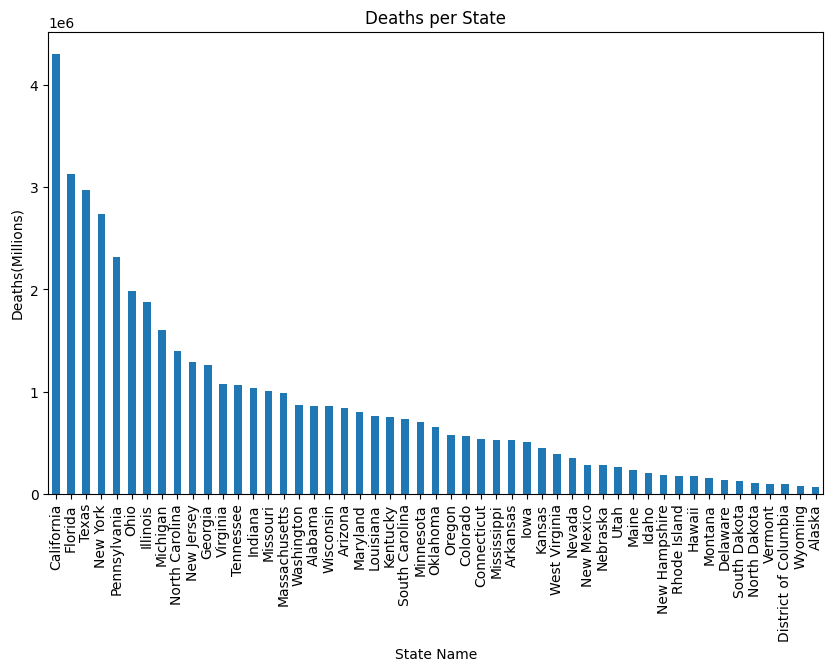

In [155]:
df1.groupby('State')['Deaths'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,6))
plt.title('Deaths per State')
plt.xlabel('State Name')
plt.ylabel('Deaths(Millions)');

### Inspecting our data

Let's go one step further and print the data type of each column. 

In the cell below, use the `.info()` method of the DataFrame, and note the data type that each column is currently stored as.  

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Notes                     0 non-null      float64
 1   State                     4115 non-null   object 
 2   State Code                4115 non-null   int64  
 3   Ten-Year Age Groups       4115 non-null   object 
 4   Ten-Year Age Groups Code  4115 non-null   object 
 5   Gender                    4115 non-null   object 
 6   Gender Code               4115 non-null   object 
 7   Race                      4115 non-null   object 
 8   Race Code                 4115 non-null   object 
 9   Deaths                    4115 non-null   int64  
 10  Population                4115 non-null   object 
 11  Crude Rate                4115 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


In [157]:
df1['Population'].head()
# This should be an integer honestly

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

In [158]:
df1['Population'].value_counts().head()

Not Applicable    75
2777               2
16653              2
3240               2
907                2
Name: Population, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### Reformat the `Population` column as an integer
As it stands, not all values can be reformated as integers. Most of the cells in the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `'Not Applicable'`.

We need to remove these rows before we can cast the `Population` column to an integer data type. 

In the cell below:

* Slice the rows of `df` where the `Population` column is equal to `'Not Applicable'`  
* Use `to_drop.index` to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`  
* Cast the `Population` column to an integer data type using the `.astype()` method, with the single parameter `int64` passed in  
* Print the `Population` column's `dtype` attribute to confirm it is now stored in `int64` format  


**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it.

In [159]:
to_drop = df1.loc[df1['Population'] == 'Not Applicable']
to_drop

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
80,NaN,Alabama,1,Not Stated,NS,Male,M,White,2106-3,13,Not Applicable,Not Applicable
251,NaN,Arizona,4,Not Stated,NS,Female,F,White,2106-3,99,Not Applicable,Not Applicable
252,NaN,Arizona,4,Not Stated,NS,Male,M,American Indian or Alaska Native,1002-5,23,Not Applicable,Not Applicable
253,NaN,Arizona,4,Not Stated,NS,Male,M,Black or African American,2054-5,12,Not Applicable,Not Applicable
254,NaN,Arizona,4,Not Stated,NS,Male,M,White,2106-3,438,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
3588,NaN,Texas,48,Not Stated,NS,Male,M,White,2106-3,251,Not Applicable,Not Applicable
3674,NaN,Utah,49,Not Stated,NS,Male,M,White,2106-3,19,Not Applicable,Not Applicable
3807,NaN,Virginia,51,Not Stated,NS,Male,M,Black or African American,2054-5,17,Not Applicable,Not Applicable
3808,NaN,Virginia,51,Not Stated,NS,Male,M,White,2106-3,23,Not Applicable,Not Applicable


In [160]:
# To drop the indices of the to_drop rows
df1.drop(to_drop.index, axis = 0, inplace = True)

In [161]:
# Changing data type to int64
df1['Population'] = df1['Population'].astype('int64')

In [162]:
# Confirming
df1['Population'].dtype

dtype('int64')

### Complete the bar chart

Now that we've reformatted our data, let's create a bar chart of the mean `Population` by `State`. 

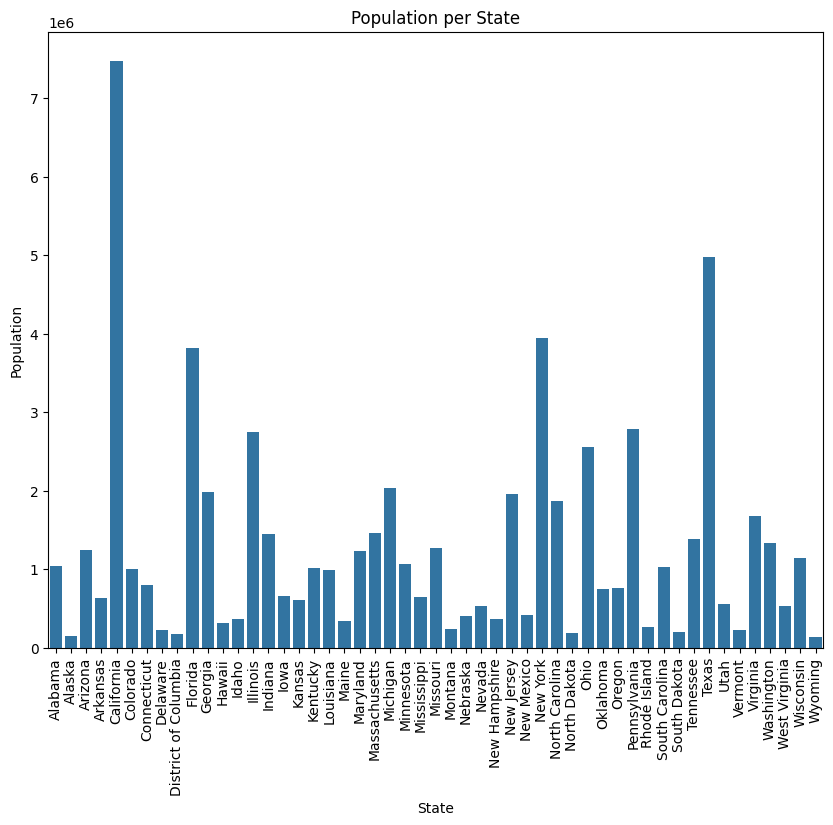

In [163]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'State',
            y = 'Population',
           data = df1,
           errorbar = None)
plt.xticks(rotation = 90)
plt.title('Population per State')
plt.show()

Below we will investigate how we can combine the `.pivot()` method along with the `.groupby()` method to combine some cool **stacked bar charts**.

## Use aggregate methods

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation of these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the `.head()` of this new DataFrame.

In [164]:
grouped = df1.groupby(['State','Gender'])['Deaths','Population'].agg(['mean','min','max','std'])

C:\Users\nrmmw\AppData\Local\Temp\ipykernel_17592\646768943.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df1.groupby(['State','Gender'])['Deaths','Population'].agg(['mean','min','max','std'])


In [165]:
grouped.head()

Deaths                              Population         \
                        mean min     max           std          mean    min   
State   Gender                                                                
Alabama Female  10753.325000  10  116297  24612.250487  1.078713e+06   2087   
        Male    10765.850000  10   88930  20813.538537  1.014946e+06   1129   
Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   1224   
        Male      860.357143  12    5185   1411.777392  1.518884e+05    578   
Arizona Female   8998.386364  21  133923  26245.941003  1.246502e+06  12211   

                                       
                    max           std  
State   Gender                         
Alabama Female  4334752  1.400309e+06  
        Male    4284775  1.397830e+06  
Alaska  Female   682855  2.015793e+05  
        Male     770502  2.238843e+05  
Arizona Female  6265346  2.096632e+06

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [166]:
grouped.index

MultiIndex([(      'Alabama', 'Female'),
            (      'Alabama',   'Male'),
            (       'Alaska', 'Female'),
            (       'Alaska',   'Male'),
            (      'Arizona', 'Female'),
            (      'Arizona',   'Male'),
            (     'Arkansas', 'Female'),
            (     'Arkansas',   'Male'),
            (   'California', 'Female'),
            (   'California',   'Male'),
            ...
            (     'Virginia', 'Female'),
            (     'Virginia',   'Male'),
            (   'Washington', 'Female'),
            (   'Washington',   'Male'),
            ('West Virginia', 'Female'),
            ('West Virginia',   'Male'),
            (    'Wisconsin', 'Female'),
            (    'Wisconsin',   'Male'),
            (      'Wyoming', 'Female'),
            (      'Wyoming',   'Male')],
           names=['State', 'Gender'], length=102)

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `.reset_index()` method.  Then, display the `.head()` of the DataFrame.  

In [167]:
grouped = grouped.reset_index()

In [168]:
# State and Gender are now columns
grouped

State  Gender        Deaths                            \
                                    mean min     max           std   
0          Alabama  Female  10753.325000  10  116297  24612.250487   
1          Alabama    Male  10765.850000  10   88930  20813.538537   
2           Alaska  Female    679.975000  13    4727   1154.870455   
3           Alaska    Male    860.357143  12    5185   1411.777392   
4          Arizona  Female   8998.386364  21  133923  26245.941003   
..             ...     ...           ...  ..     ...           ...   
97   West Virginia    Male   6211.612903  10   51167  13336.347773   
98       Wisconsin  Female   9918.113636  10  189242  33167.159673   
99       Wisconsin    Male   9573.454545  13  113692  25681.359187   
100        Wyoming  Female   1161.031250  10   13140   2937.935467   
101        Wyoming    Male   1149.514286  10   10113   2569.276968   

       Population                                
             mean    min      max           std  
0    1.078713e+06   2087  4334752  1.400309e+06  
1    1.014946e+06   1129  4284775  1.397830e+06  
2    1.440403e+05   1224   682855  2.015793e+05  
3    1.518884e+05    578   770502  2.238843e+05  
4    1.246502e+06  12211  6265346  2.096632e+06  
..            ...    ...      ...           ...  
97   5.189614e+05    446  2307190  8.115125e+05  
98   1.154722e+06   3376  6778013  2.047541e+06  
99   1.135321e+06   1286  6860107  2.089072e+06  
100  1.467575e+05    336   672620  2.352378e+05  
101  1.392236e+05    244   694760  2.413599e+05  

[102 rows x 10 columns]

Note how the way index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [169]:
grouped.index

RangeIndex(start=0, stop=102, step=1)

However, look again at the displayed DataFrame -- specifically, the columns. Resetting the index has caused the DataFrame to use a multi-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [170]:
# Columns are now multiindexed
grouped.columns

MultiIndex([(     'State',     ''),
            (    'Gender',     ''),
            (    'Deaths', 'mean'),
            (    'Deaths',  'min'),
            (    'Deaths',  'max'),
            (    'Deaths',  'std'),
            ('Population', 'mean'),
            ('Population',  'min'),
            ('Population',  'max'),
            ('Population',  'std')],
           )

### Column levels

Since we're working with multi-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `.get_level_values()` method contained within the DataFrame's `columns` attribute to get the values for the outermost layer of the index. 

In [171]:
# Outer Level
grouped.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population', 'Population'],
      dtype='object')

In [172]:
#Inner Level
grouped.columns.get_level_values(1)

Index(['', '', 'mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std'], dtype='object')

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to a more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it -- but take some time to examine the code in the cell below and see if you can understand how it works. 

In [173]:
# We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [
    col0 + "_" + col1 if col1 != "" else col0 for col0, col1 in list(zip(cols0, cols1))
]
# The list comprehension above is more complicated then what we need but creates a nicer formatting and
# demonstrates using a conditional within a list comprehension.
# This simpler version works but has some tail underscores where col1 is blank:
# grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['State', 'Gender', 'Deaths_mean', 'Deaths_min', 'Deaths_max',
       'Deaths_std', 'Population_mean', 'Population_min', 'Population_max',
       'Population_std'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the `.head()` of the `grouped` DataFrame. 

In [174]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087,4334752,1.400309e+06
1,Alabama,Male,10765.850000,10,88930,20813.538537,1.014946e+06,1129,4284775,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224,682855,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578,770502,2.238843e+05
4,Arizona,Female,8998.386364,21,133923,26245.941003,1.246502e+06,12211,6265346,2.096632e+06


## Using pivots

Now, we'll gain some practice using the DataFrame's built-in `.pivot()` method.  

In the cell below, call the DataFrame's `.pivot()` method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the `.head()` of our new `pivot` DataFrame to see what it looks like. 

In [177]:
pivot = grouped.pivot(index = 'State', columns = 'Gender', values = 'Deaths_mean')
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727


We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the `.head()` of the object to see if we can detect any changes.`

In [178]:
pivot = pivot.reset_index()
pivot

Gender,State,Female,Male
0,Alabama,10753.325000,10765.850000
1,Alaska,679.975000,860.357143
2,Arizona,8998.386364,10036.204545
3,Arkansas,6621.615385,6301.690476
4,California,48312.840909,49555.522727
5,Colorado,6460.162791,6442.500000
6,Connecticut,7144.641026,6315.300000
7,Delaware,2000.029412,1940.914286
8,District of Columbia,1497.580645,1534.806452
9,Florida,36019.071429,36771.340909


### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

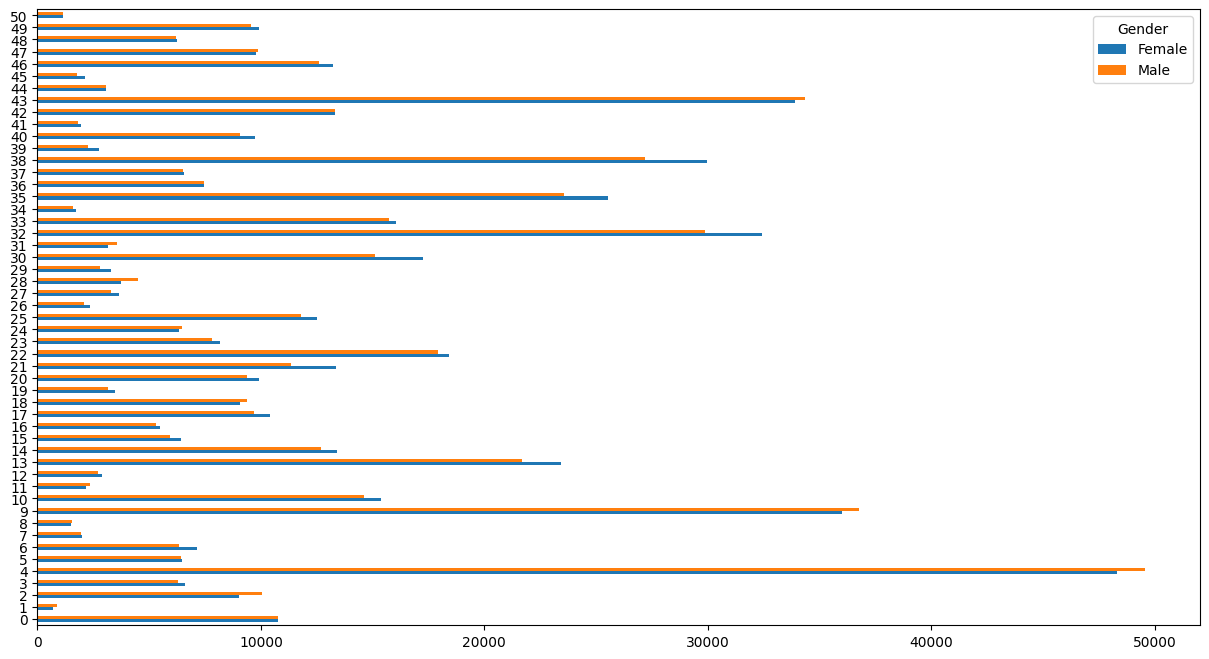

In [180]:
pivot.plot(kind = 'barh', figsize = (15,8));

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `.set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods -- do not rebind `pivot` to be equal to this line of code. 

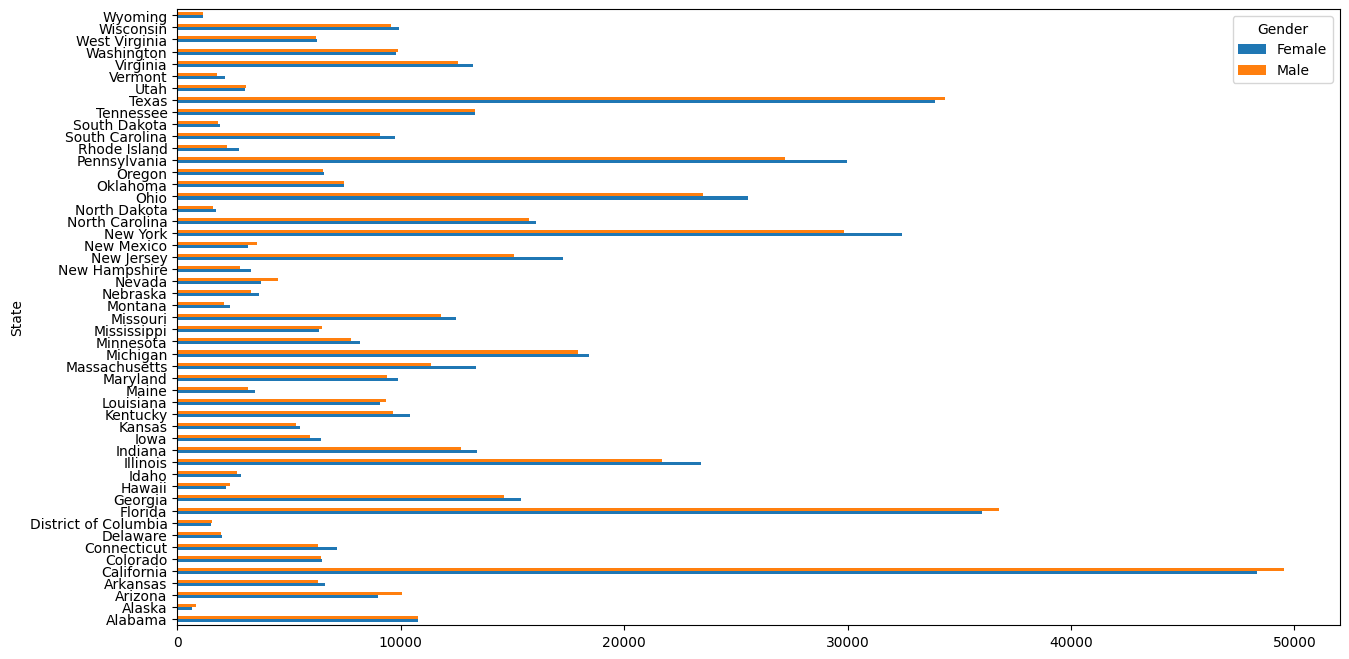

In [181]:
pivot.set_index('State').plot(kind = 'barh',figsize = (15,8));

Now that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [183]:
pivot.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10765.850000
1,Alaska,679.975000,860.357143
2,Arizona,8998.386364,10036.204545
3,Arkansas,6621.615385,6301.690476
4,California,48312.840909,49555.522727


Note that the index has not changed.  That's because the code we wrote when we set the index to the `'State'` column returns a copy of the DataFrame object with the index set to `'State'` -- by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.

In [184]:
pivot = pivot.set_index('State')

In [187]:
# Index structure has changed
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10765.850000
Alaska,679.975000,860.357143
Arizona,8998.386364,10036.204545
Arkansas,6621.615385,6301.690476
California,48312.840909,49555.522727


Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

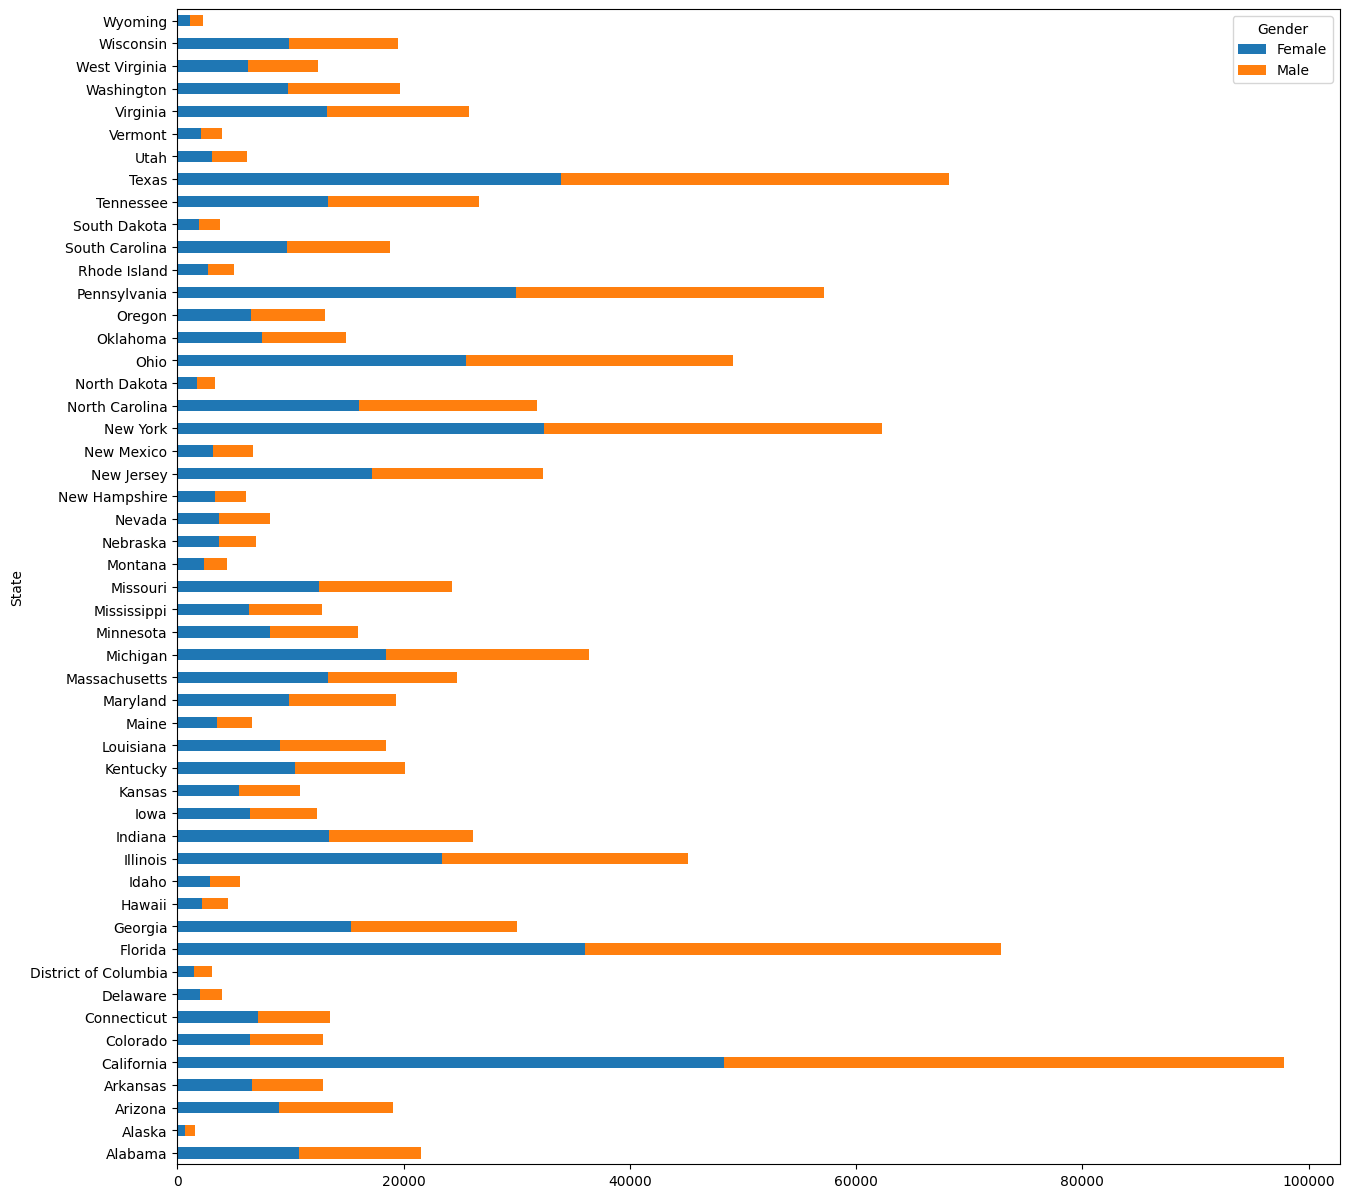

In [190]:
pivot.plot(kind = 'barh', figsize = (15,15), stacked = True);
# This is honestly pretty cool

## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [191]:
grouped.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087,4334752,1.400309e+06
1,Alabama,Male,10765.850000,10,88930,20813.538537,1.014946e+06,1129,4284775,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224,682855,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578,770502,2.238843e+05
4,Arizona,Female,8998.386364,21,133923,26245.941003,1.246502e+06,12211,6265346,2.096632e+06


As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [194]:
grouped.stack()

0    State                    Alabama
     Gender                    Female
     Deaths_mean            10753.325
     Deaths_min                    10
     Deaths_max                116297
                            ...      
101  Deaths_std           2569.276968
     Population_mean         139223.6
     Population_min               244
     Population_max            694760
     Population_std     241359.853616
Length: 1020, dtype: object

As we can see, the `.stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index. This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [196]:
pivot = pivot.unstack()

In [199]:
pivot.head()

Gender  State     
Female  Alabama       10753.325000
        Alaska          679.975000
        Arizona        8998.386364
        Arkansas       6621.615385
        California    48312.840909
dtype: float64

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results.

In the cell below, set `pivot` equal to `pivot.unstack()` again, and then print the `pivot` object to see how things have changed.

In [200]:
pivot = pivot.unstack()

In [201]:
pivot.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Gender,,,,,,,,,,,,,,,,,,,,,
Female,10753.325,679.975000,8998.386364,6621.615385,48312.840909,6460.162791,7144.641026,2000.029412,1497.580645,36019.071429,...,1932.757576,13334.325,33897.953488,3046.547619,2124.695652,13232.146341,9796.863636,6247.225806,9918.113636,1161.031250
Male,10765.850,860.357143,10036.204545,6301.690476,49555.522727,6442.500000,6315.300000,1940.914286,1534.806452,36771.340909,...,1800.500000,13333.050,34347.636364,3081.511628,1785.846154,12585.833333,9877.431818,6211.612903,9573.454545,1149.514286


After calling unstack a second time, we can see that pivot has a flattened structure since it has been completely unstacked.